#  Part-I: GDP ANALYSIS OF INDIAN STATES 

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import glob
import warnings
warnings.filterwarnings('ignore')

## Part I-A:

In [2]:
#Read the GDP dataset 
df=pd.read_csv('ab40c054-5031-4376-b52e-9813e776f65e.csv')
df.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0,13675331.0


In [3]:
# Determining the shape of the dataframe and the number of null values
print(f'The shape of the data frame :',df.shape)

The shape of the data frame : (11, 36)


In [4]:
#Analysing the number of null values in each column
df.isnull().sum()

Items  Description            0
Duration                      0
Andhra Pradesh                0
Arunachal Pradesh             2
Assam                         2
Bihar                         2
Chhattisgarh                  0
Goa                           2
Gujarat                       2
Haryana                       0
Himachal Pradesh              4
Jammu & Kashmir               2
Jharkhand                     2
Karnataka                     2
Kerala                        2
Madhya Pradesh                0
Maharashtra                   4
Manipur                       4
Meghalaya                     0
Mizoram                       4
Nagaland                      4
Odisha                        0
Punjab                        4
Rajasthan                     4
Sikkim                        2
Tamil Nadu                    0
Telangana                     0
Tripura                       4
Uttar Pradesh                 2
Uttarakhand                   2
West Bengal1                 11
Andaman 

In [5]:
#checking the % of NANs columnwise
df.isnull().sum()*100/df.shape[0] 

Items  Description             0.000000
Duration                       0.000000
Andhra Pradesh                 0.000000
Arunachal Pradesh             18.181818
Assam                         18.181818
Bihar                         18.181818
Chhattisgarh                   0.000000
Goa                           18.181818
Gujarat                       18.181818
Haryana                        0.000000
Himachal Pradesh              36.363636
Jammu & Kashmir               18.181818
Jharkhand                     18.181818
Karnataka                     18.181818
Kerala                        18.181818
Madhya Pradesh                 0.000000
Maharashtra                   36.363636
Manipur                       36.363636
Meghalaya                      0.000000
Mizoram                       36.363636
Nagaland                      36.363636
Odisha                         0.000000
Punjab                        36.363636
Rajasthan                     36.363636
Sikkim                        18.181818


From the above information, it is clear that data pertaining to the column West Bengal is all NAN. Hence it has to be removed

In [6]:
#Removing the data related to Union territories and West Bengal
df.drop(['West Bengal1','Andaman & Nicobar Islands','Chandigarh','Delhi','Puducherry'],axis=1,inplace=True)

In [7]:
#Removing the rows: '% Growth over the previous year' and 'GSDP-CURRENT PRICES' for the year 2016-17.
df = df[df['Duration']!='2016-17']
df

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,227872.00,266628.00,436465.00,11165.00,751485.00,359433.00,19208.00,724049.00,115523.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,258275.00,297734.00,494004.00,12338.00,855481.00,401493.00,21663.00,822903.00,131835.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,291709.00,334714.00,549701.00,13862.00,971090.00,452186.00,25593.00,944146.00,149817.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,321971.00,368011.00,612194.00,15209.00,1092564.00,511178.00,29667.00,1043371.00,161985.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,341887.00,NaN,NaN,16637.00,1212668.00,575631.00,NaN,1153795.00,184091.00,13675331.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,9.99


### Average growth of states for three years from 2013 to 2016

In [8]:
#Selecting only the required financial years from 2013 to 2016
df=df[(df['Duration']=='2013-14')| (df['Duration']=='2014-15')| (df['Duration']=='2015-16')]
df

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,291709.00,334714.00,549701.00,13862.00,971090.00,452186.00,25593.00,944146.00,149817.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,321971.00,368011.00,612194.00,15209.00,1092564.00,511178.00,29667.00,1043371.00,161985.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,341887.00,NaN,NaN,16637.00,1212668.00,575631.00,NaN,1153795.00,184091.00,13675331.00
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,9.99


Text(0, 0.5, 'Percentage growth in GDP')

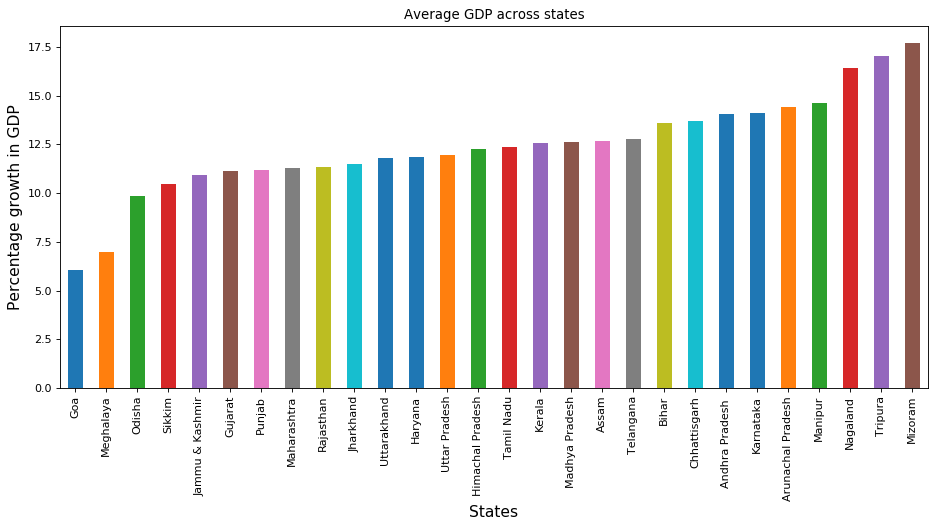

In [9]:
#Plotting the total average growth of states
plt.figure(figsize=(14,6), dpi=80, facecolor='w')
df.iloc[:,:-1].groupby(['Items  Description']).get_group('(% Growth over previous year)').mean().sort_values().plot.bar(title='Average GDP across states')
plt.xlabel('States',fontsize=14)
plt.ylabel('Percentage growth in GDP',fontsize=14)

From the above plot it is clear that Mizoram,Tripura and Nagaland  are growing consistently fast while Goa and Meghalaya are struggling .

### Curiosity Exercise

In [10]:
Comparison=df[(df['Items  Description']=='(% Growth over previous year)')][['Tamil Nadu', 'All_India GDP']].mean()
print(Comparison)
print("My state, Tamil Nadu has a GDP that is {} times higher than national average during the given duration" .format(round(Comparison[0]/Comparison[1],2)))


Tamil Nadu       12.336667
All_India GDP    11.203333
dtype: float64
My state, Tamil Nadu has a GDP that is 1.1 times higher than national average during the given duration


## Total GDP of the states for the year 2015-16

In [11]:
 # dropping the column All India GDP since it is not required anymore 
df.drop(['All_India GDP'], axis=1,inplace=True)
#selecting total GDP of the states for the year 2015-16:
df=df[(df['Items  Description']=='GSDP - CURRENT PRICES (` in Crore)')&(df['Duration']=='2015-16')]


In [12]:
#changing the shape of the dataframe to plot the values
df=pd.melt(df[df.columns[2:]]).sort_values(['value'])
df.head()

,variable,value
22,Sikkim,16637.0
1,Arunachal Pradesh,18784.0
16,Meghalaya,26745.0
5,Goa,45002.0
9,Jammu & Kashmir,118387.0


Text(0, 0.5, 'GDP in Crores')

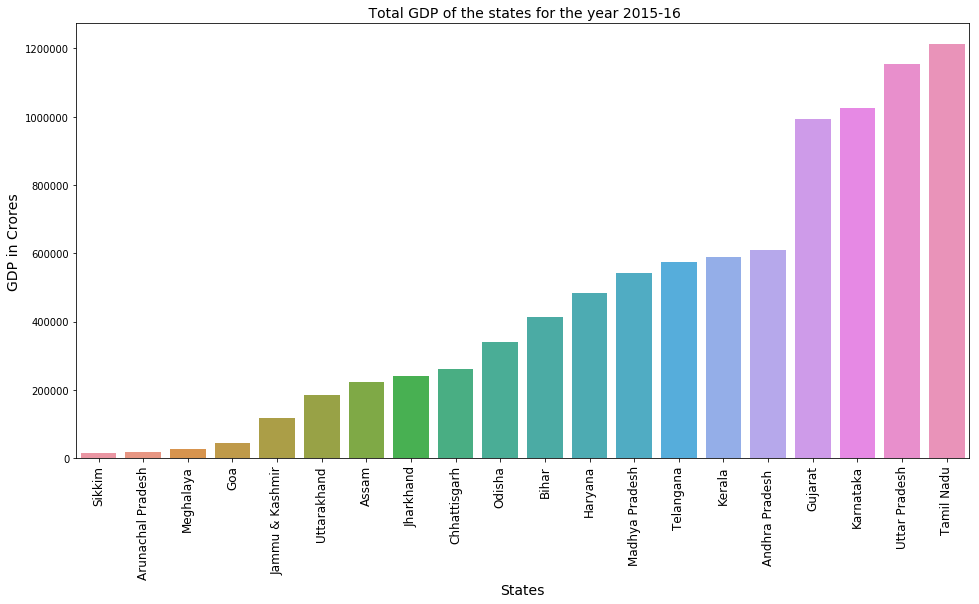

In [13]:
#Plotting the total GDP of the states for the year 2015-16
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(x=df.dropna(axis='rows').variable,y=df.dropna(axis='rows').value) # dropping the na values and plotting 
plt.title(' Total GDP of the states for the year 2015-16',fontsize=14)
plt.xticks(rotation=90,fontsize=12)

plt.xlabel('States',fontsize=14)
plt.ylabel('GDP in Crores',fontsize=14)



Tamil Nadu, Uttar Pradesh, Karnataka, Gujarat and Andhra Pradesh are the top five states having the highest GDP and Sikkim,Arunacahal Pradesh, Meghalaya , Goa and Jammu & Kashmir are the bottom five states having the lowest GDP for the year 2015-16. 

## Part I-B

In [14]:
# Importing datasets
df_list = []   # initialize a list for storing all the dataframes
cols = ['Item','2014-15']   # to read only the columns required for analysis

for file in glob.glob("NAD-*.csv"):  # reading only those files that start with NAD (data relevant to PArt I B)
    state = file.split('.')[0].split('NAD-')[1].split('-')[0]  # extract the name of the state from file name
    df = (pd.read_csv(file,usecols=cols))        # reading only specified columns from csv file
    df.rename(columns={'2014-15':state},inplace=True)  # renaming the year column to indicate the name of the state
    df_list.append(df)                              # storing the dataframe in a list  

df_state = reduce(lambda  left,right: pd.merge(left,right,on='Item',how='outer'), df_list)  # merging all the dataframe in the list
df_state.head()

,Item,Andaman_Nicobar_Islands,Andhra_Pradesh,Arunachal_Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Delhi,Goa,...,Odisha,Puducherry,Punjab,Rajasthan,Sikkim,Tamil_Nadu,Telangana,Tripura,Uttarakhand,Uttar_Pradesh
0,"Agriculture, forestry and fishing",76670.0,14819416.0,686117.0,3855548.0,7951890.0,16233.0,3948847.0,250568.0,308507.0,...,6422978.0,113156.0,9285716.0,15044394.0,137447.0,13064238.0,7591501.0,799825.0,1601423.0,25097754.0
1,Crops,34026.0,7893514.0,415520.0,2890544.0,4688237.0,1659.0,2613371.0,64959.0,140421.0,...,4382636.0,38878.0,5690972.0,7673441.0,114976.0,7297820.0,4162493.0,397591.0,866146.0,16215212.0
2,Livestock,19560.0,4309078.0,38387.0,173478.0,2060296.0,13992.0,352208.0,183770.0,30141.0,...,788243.0,45358.0,2638842.0,5356257.0,17338.0,4693361.0,2951299.0,88176.0,391188.0,7096876.0
3,Forestry and logging,4634.0,346160.0,224017.0,261987.0,550132.0,388.0,597785.0,861.0,15744.0,...,791463.0,3931.0,848245.0,1956660.0,4529.0,392705.0,210741.0,145096.0,339293.0,1404936.0
4,Fishing and aquaculture,18451.0,2270664.0,8193.0,529539.0,653224.0,194.0,385483.0,978.0,122201.0,...,460636.0,24989.0,107657.0,58036.0,604.0,680352.0,266968.0,168961.0,4796.0,380730.0


In [15]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 33 columns):
Item                       37 non-null object
Andaman_Nicobar_Islands    32 non-null float64
Andhra_Pradesh             33 non-null float64
Arunachal_Pradesh          33 non-null float64
Assam                      33 non-null float64
Bihar                      33 non-null float64
Chandigarh                 33 non-null float64
Chhattisgarh               33 non-null float64
Delhi                      33 non-null float64
Goa                        33 non-null float64
Gujarat                    29 non-null float64
Haryana                    31 non-null float64
Himachal_Pradesh           33 non-null float64
Jammu_Kashmir              33 non-null float64
Jharkhand                  33 non-null float64
Karnataka                  33 non-null float64
Kerala                     33 non-null float64
Madhya_Pradesh             33 non-null float64
Maharashtra                33 non-null float64
Manip

In [16]:
# Getting rid of '_' from state names
df_state.columns=df_state.columns.str.replace('_',' ')
df_state.columns

Index(['Item', 'Andaman Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttarakhand', 'Uttar Pradesh'],
      dtype='object')

In [17]:
#Filtering out the union territories
df_state.drop(['Andaman Nicobar Islands','Chandigarh','Delhi','Puducherry'],axis=1,inplace=True)

In [18]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 29 columns):
Item                 37 non-null object
Andhra Pradesh       33 non-null float64
Arunachal Pradesh    33 non-null float64
Assam                33 non-null float64
Bihar                33 non-null float64
Chhattisgarh         33 non-null float64
Goa                  33 non-null float64
Gujarat              29 non-null float64
Haryana              31 non-null float64
Himachal Pradesh     33 non-null float64
Jammu Kashmir        33 non-null float64
Jharkhand            33 non-null float64
Karnataka            33 non-null float64
Kerala               33 non-null float64
Madhya Pradesh       33 non-null float64
Maharashtra          33 non-null float64
Manipur              30 non-null float64
Meghalaya            31 non-null float64
Mizoram              33 non-null float64
Nagaland             33 non-null float64
Odisha               33 non-null float64
Punjab               33 non-null floa

### GDP per capita for all states

In [19]:
df1= df_state.loc[df_state['Item']=='Per Capita GSDP (Rs.)']
df1=pd.melt(df1[df1.columns[2:]]).sort_values(['value'])

Text(0, 0.5, 'GDP Percapita (Rs.)')

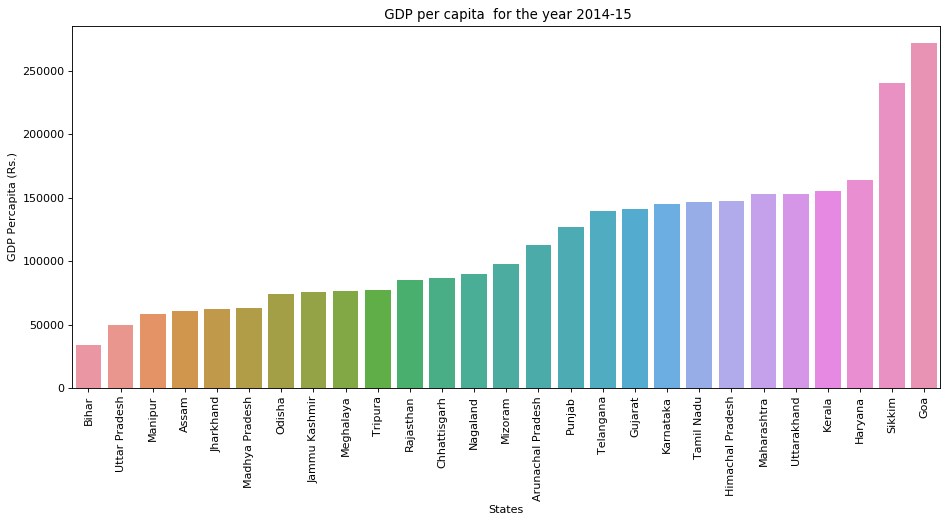

In [20]:
plt.figure(figsize=(14,6), dpi=80, facecolor='w')
sns.barplot(x=df1.variable,y=df1.value)

plt.title(' GDP per capita  for the year 2014-15')
plt.xticks(rotation=90)

plt.xlabel('States')
plt.ylabel('GDP Percapita (Rs.)')

Thus from the above plot we can conclude that Bihar,Utta Pradesh, Assam, Jharkhand and Madhya Pradesh are the bottom five states and Goa, Sikkim, Haryana,Kerala and Uttrakhand are the top five states in terms of GDP Percapita.

#### Ratio of the highest per capita GDP to the lowest per capita GDP

In [21]:
#Ratio of the highest per capita GDP to the lowest per capita GDP
print("The ratio of the highest per capita GDP to the lowest per capita GDP is {}" .format(round(df1.value.max()/df1.value.min(),2)))

The ratio of the highest per capita GDP to the lowest per capita GDP is 8.0


### Percentage contribution of primary, secondary and tertiary sectors as a percentage of total GDP for all  states.

In [22]:
df_state

,Item,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttarakhand,Uttar Pradesh
0,"Agriculture, forestry and fishing",14819416.0,686117.0,3855548.0,7951890.0,3948847.0,308507.0,13769969.00,8015238.0,1514981.0,...,607897.0,6422978.0,9285716.0,15044394.0,137447.0,13064238.0,7591501.0,799825.0,1601423.0,25097754.0
1,Crops,7893514.0,415520.0,2890544.0,4688237.0,2613371.0,140421.0,9671086.00,4636731.0,853758.0,...,375825.0,4382636.0,5690972.0,7673441.0,114976.0,7297820.0,4162493.0,397591.0,866146.0,16215212.0
2,Livestock,4309078.0,38387.0,173478.0,2060296.0,352208.0,30141.0,2698910.00,2916173.0,110304.0,...,123800.0,788243.0,2638842.0,5356257.0,17338.0,4693361.0,2951299.0,88176.0,391188.0,7096876.0
3,Forestry and logging,346160.0,224017.0,261987.0,550132.0,597785.0,15744.0,761616.00,352254.0,540950.0,...,99802.0,791463.0,848245.0,1956660.0,4529.0,392705.0,210741.0,145096.0,339293.0,1404936.0
4,Fishing and aquaculture,2270664.0,8193.0,529539.0,653224.0,385483.0,122201.0,638357.00,110080.0,9968.0,...,8470.0,460636.0,107657.0,58036.0,604.0,680352.0,266968.0,168961.0,4796.0,380730.0
5,Mining and quarrying,1484300.0,30842.0,1471149.0,68107.0,2451970.0,3622.0,2117218.00,25186.0,33385.0,...,8280.0,2586328.0,10354.0,4069385.0,1329.0,265536.0,1541853.0,142391.0,244549.0,901501.0
6,Primary,16303716.0,716959.0,5326697.0,8019997.0,6400817.0,312129.0,15887187.00,8040424.0,1548366.0,...,616178.0,9009306.0,9296070.0,19113780.0,138776.0,13329774.0,9133354.0,942216.0,1845972.0,25999255.0
7,Manufacturing,4672266.0,26120.0,2002936.0,2189965.0,4370593.0,1177608.0,24087538.00,7756921.0,2543637.0,...,18346.0,5754229.0,4790341.0,6552580.0,550697.0,18914794.0,6353711.0,228625.0,5866252.0,12261649.0
8,"Electricity, gas, water supply & other utility...",1151729.0,113527.0,296587.0,345168.0,1198438.0,204110.0,3409983.00,1101919.0,767268.0,...,37944.0,833067.0,911611.0,1122888.0,212499.0,1710379.0,716266.0,77870.0,433880.0,2030625.0
9,Construction,4664889.0,147842.0,1733568.0,3449763.0,2669855.0,165819.0,5526017.00,3702571.0,808256.0,...,156072.0,2402396.0,2202962.0,5353326.0,82058.0,12216718.0,2854024.0,177899.0,1342733.0,11256450.0


In [23]:
# Selecting the sectors and total GDP and storing it in a new dataframe
df_2=df_state.loc[(df_state['Item']=='Primary') | (df_state['Item']=='Secondary') | (df_state['Item']=='Tertiary') | (df_state['Item']=='Gross State Domestic Product')| (df_state['Item']=='Per Capita GSDP (Rs.)')]
df_2 = df_2.set_index('Item').T
df_2.head()

Item,Primary,Secondary,Tertiary,Gross State Domestic Product,Per Capita GSDP (Rs.)
Andhra Pradesh,16303716.0,10488884.0,22032942.0,52646842.0,104977.0
Arunachal Pradesh,716959.0,287489.0,631844.0,1676119.0,112718.0
Assam,5326697.0,4033091.0,9307109.0,19809800.0,60621.0
Bihar,8019997.0,5984896.0,22179969.0,37391988.0,33954.0
Chhattisgarh,6400817.0,8238886.0,7588778.0,23498180.0,86860.0


In [24]:
# Converting the contribution of primary, secondary and tertiary sectors into percentage of total GSDP
df_2['Primary'] = round(100* df_2['Primary']/ df_2['Gross State Domestic Product'],2)
df_2['Secondary'] = round(100*df_2['Secondary']/ df_2['Gross State Domestic Product'],2)
df_2['Tertiary'] =round(100* df_2['Tertiary']/ df_2['Gross State Domestic Product'],2)
df_2=df_2.sort_values(by='Per Capita GSDP (Rs.)')  # to sort the dataframe based on GSDP
df_2.head()

Item,Primary,Secondary,Tertiary,Gross State Domestic Product,Per Capita GSDP (Rs.)
Bihar,21.45,16.01,59.32,37391988.0,33954.0
Uttar Pradesh,24.92,24.49,44.06,104337115.0,49450.0
Manipur,21.24,12.20,65.25,1804276.0,58442.0
Assam,26.89,20.36,46.98,19809800.0,60621.0
Jharkhand,24.17,28.75,37.46,21710718.0,62091.0


Text(0, 0.5, 'Percentage')

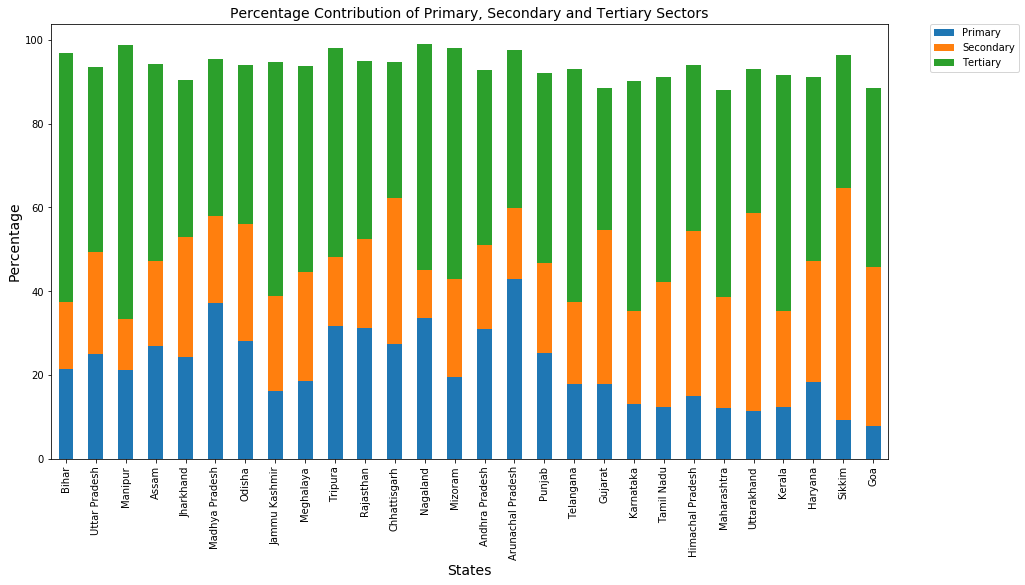

In [25]:
# plotting the percentage contribution of each sector
fig, ax = plt.subplots(figsize=(15,8))
df_2[['Primary','Secondary', 'Tertiary']].plot.bar(ax=ax,stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Percentage Contribution of Primary, Secondary and Tertiary Sectors',fontsize=14)
plt.xlabel('States',fontsize=14)
plt.ylabel('Percentage',fontsize=14)

The results shown above suggests that for most of the states, secondary and tertiary sectors are the major contributors of the state's GDP. For a very few states like Arunachal Pradesh and Madhya pradesh, Primary sector is the major contibutor. It is surprising to note that secondary or tertiary sectors are major contributors for states with lowest GDP like Mizoram and Sikkim as well as for states with highest GDP like Tamil Nadu and Maharashtra

#### Categorisation of the States based on GDP per capita

In [26]:
#Categorising the states into four groups based on the GDP per capita
df_3=df_state.set_index('Item').T
df_3['Category']=pd.qcut(df_3['Per Capita GSDP (Rs.)'],[0.0,0.2,0.5,0.85,1],labels=['C4','C3','C2','C1'])
print(df_3.shape)
df_3.head()

(28, 38)


Item,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Services incidental to transport*,Trade & repair services*,Road transport**,Road transport*,Category
Andhra Pradesh,14819416.0,7893514.0,4309078.0,346160.0,2270664.0,1484300.0,16303716.0,4672266.0,1151729.0,4664889.0,...,5512100.0,1690800.0,52646842.0,501510.0,104977.0,NaN,NaN,NaN,NaN,C2
Arunachal Pradesh,686117.0,415520.0,38387.0,224017.0,8193.0,30842.0,716959.0,26120.0,113527.0,147842.0,...,70099.0,30272.0,1676119.0,14870.0,112718.0,NaN,NaN,NaN,NaN,C2
Assam,3855548.0,2890544.0,173478.0,261987.0,529539.0,1471149.0,5326697.0,2002936.0,296587.0,1733568.0,...,1725309.0,582406.0,19809800.0,326780.0,60621.0,NaN,NaN,NaN,NaN,C4
Bihar,7951890.0,4688237.0,2060296.0,550132.0,653224.0,68107.0,8019997.0,2189965.0,345168.0,3449763.0,...,3213546.0,2006421.0,37391988.0,1101240.0,33954.0,NaN,NaN,NaN,NaN,C4
Chhattisgarh,3948847.0,2613371.0,352208.0,597785.0,385483.0,2451970.0,6400817.0,4370593.0,1198438.0,2669855.0,...,2601791.0,1332092.0,23498180.0,270530.0,86860.0,NaN,NaN,NaN,NaN,C3


In [27]:
df_3=df_3[['Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services', 'Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services','Public administration','Other services','Gross State Domestic Product','Category']]
df_3.head()

Item,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product,Category
Andhra Pradesh,14819416.0,1484300.0,4672266.0,1151729.0,4664889.0,4233400.0,5076984.0,1900863.0,4405409.0,2200897.0,4215389.0,52646842.0,C2
Arunachal Pradesh,686117.0,30842.0,26120.0,113527.0,147842.0,60421.0,35203.0,25207.0,48418.0,243867.0,218728.0,1676119.0,C2
Assam,3855548.0,1471149.0,2002936.0,296587.0,1733568.0,2987155.0,1194568.0,543651.0,1412466.0,1373611.0,1795658.0,19809800.0,C4
Bihar,7951890.0,68107.0,2189965.0,345168.0,3449763.0,7448373.0,3147173.0,1178022.0,3740641.0,2078171.0,4587589.0,37391988.0,C4
Chhattisgarh,3948847.0,2451970.0,4370593.0,1198438.0,2669855.0,1535571.0,871770.0,739057.0,2462166.0,867982.0,1112232.0,23498180.0,C3


In [28]:
df_cat=pd.DataFrame(df_3.groupby('Category').sum())
df_cat


Item,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product
Category,,,,,,,,,,,,
C4,56735044.0,6096419.0,24987032.0,4310264.0,22775948.0,27484595.0,16191800.0,7684498.0,24177534.0,13486630.0,15859015.0,233252066.0
C3,28994177.0,9385092.0,18259272.0,4050466.0,11828535.0,13901840.0,7867052.0,4239374.0,13158791.0,7076156.0,9546854.0,135359991.0
C2,88427015.0,11613097.0,108002544.0,14541227.0,43975718.0,63729156.0,37760099.0,37812475.0,95695548.0,20189303.0,39486616.0,622828765.0
C1,15993232.0,833510.0,19625045.0,2434878.0,12607184.0,15738265.0,7885253.0,4321519.0,15571552.0,4150701.0,9042352.0,118129206.0


In [29]:
#Transposing the data frame
df_cat=df_cat.reset_index().T
df_cat.head()

,0,1,2,3
Item,,,,
Category,C4,C3,C2,C1
"Agriculture, forestry and fishing",5.6735e+07,2.89942e+07,8.8427e+07,1.59932e+07
Mining and quarrying,6.09642e+06,9.38509e+06,1.16131e+07,833510
Manufacturing,2.4987e+07,1.82593e+07,1.08003e+08,1.9625e+07
"Electricity, gas, water supply & other utility services",4.31026e+06,4.05047e+06,1.45412e+07,2.43488e+06


In [30]:
df_cat.columns=df_cat.iloc[0]  # renaming the columns
df_cat=df_cat[1:]  # dropping the first row which contains column headers
df_cat.head()

Category,C4,C3,C2,C1
Item,,,,
"Agriculture, forestry and fishing",5.6735e+07,2.89942e+07,8.8427e+07,1.59932e+07
Mining and quarrying,6.09642e+06,9.38509e+06,1.16131e+07,833510
Manufacturing,2.4987e+07,1.82593e+07,1.08003e+08,1.9625e+07
"Electricity, gas, water supply & other utility services",4.31026e+06,4.05047e+06,1.45412e+07,2.43488e+06
Construction,2.27759e+07,1.18285e+07,4.39757e+07,1.26072e+07


In [31]:
#defining a function to determine the sub-sectors that add upto 80%
import numpy as np
from textwrap import wrap
def cum_sum(lst):
    per = lst[:-1].sort_values(ascending=False).apply(lambda x : round((100*x)/lst[-1],2))  # find the percentage contribution of sorted dataframe
    cum_per=per.cumsum()  # find the cumulative percentage
    n = np.argmin(np.abs(np.array(cum_per)-80)) # find the percentage closest to 80%
    print(cum_per.head(n+1))  # print the sectors that contributes to 805 of total
    # plotting contribution of the sub-sectors as a percentage of the GSDP of each category.  
    fig, ax1 = plt.subplots(figsize=(15,6))
    ax= per.plot.bar(ax=ax1)
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels = ["\n".join(wrap(l,15)) for l in labels]
    ax.set_ylabel('Percentage of GSDP')
    ax.set_xticklabels(labels,rotation=0)

Item
Manufacturing                                                           16.61
Agriculture, forestry and fishing                                       30.15
Trade, repair, hotels and restaurants                                   43.47
Real estate, ownership of dwelling & professional services              56.65
Construction                                                            67.32
Other services                                                          74.97
Transport, storage, communication & services related to broadcasting    81.65
Name: C1, dtype: float64


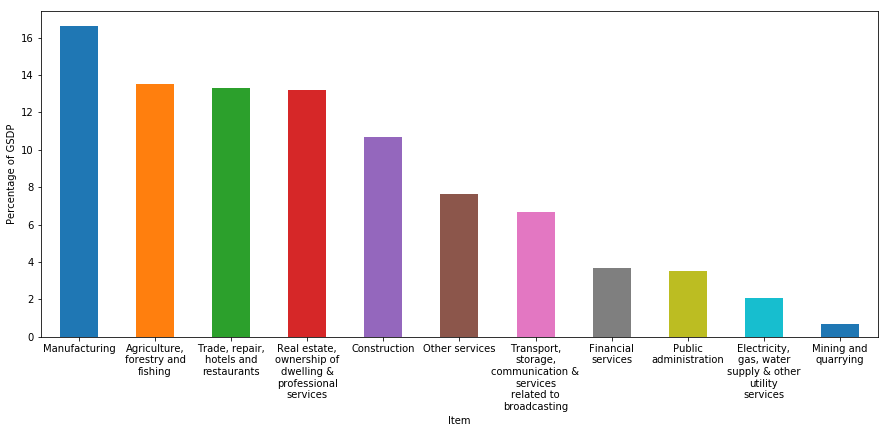

In [32]:
# Sectors that contribute to 80% of GSDP in category C1
cum_sum(df_cat['C1'])

Item
Manufacturing                                                           17.34
Real estate, ownership of dwelling & professional services              32.70
Agriculture, forestry and fishing                                       46.90
Trade, repair, hotels and restaurants                                   57.13
Construction                                                            64.19
Other services                                                          70.53
Financial services                                                      76.60
Transport, storage, communication & services related to broadcasting    82.66
Name: C2, dtype: float64


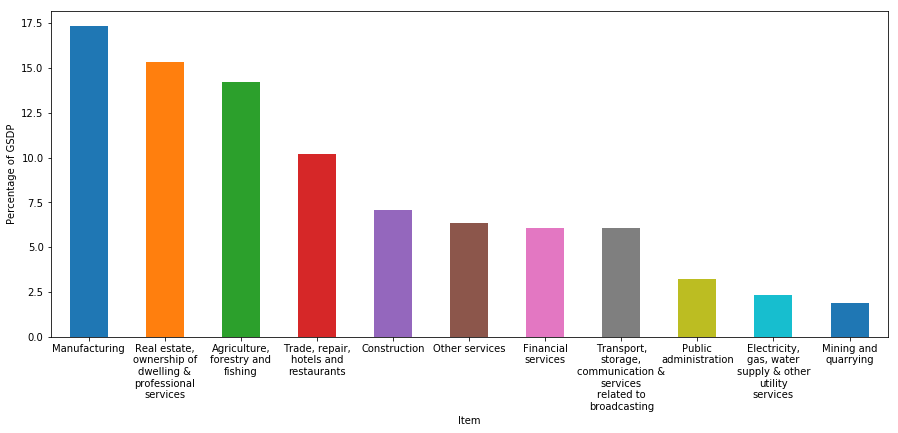

In [33]:
# Sectors that contribute to 80% of GSDP in category C2
cum_sum(df_cat['C2'])

Item
Agriculture, forestry and fishing                             21.42
Manufacturing                                                 34.91
Trade, repair, hotels and restaurants                         45.18
Real estate, ownership of dwelling & professional services    54.90
Construction                                                  63.64
Other services                                                70.69
Mining and quarrying                                          77.62
Name: C3, dtype: float64


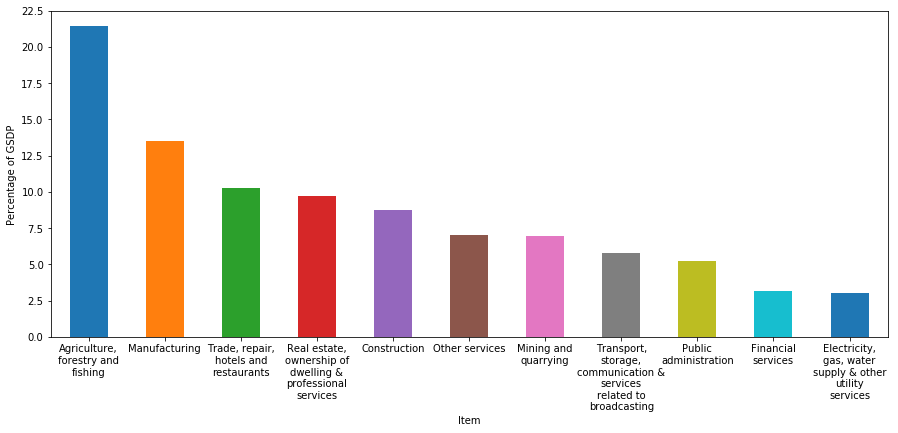

In [34]:
# Sectors that contribute to 80% of GSDP in category C3
cum_sum(df_cat['C3'])

Item
Agriculture, forestry and fishing                                       24.32
Trade, repair, hotels and restaurants                                   36.10
Manufacturing                                                           46.81
Real estate, ownership of dwelling & professional services              57.18
Construction                                                            66.94
Transport, storage, communication & services related to broadcasting    73.88
Other services                                                          80.68
Name: C4, dtype: float64


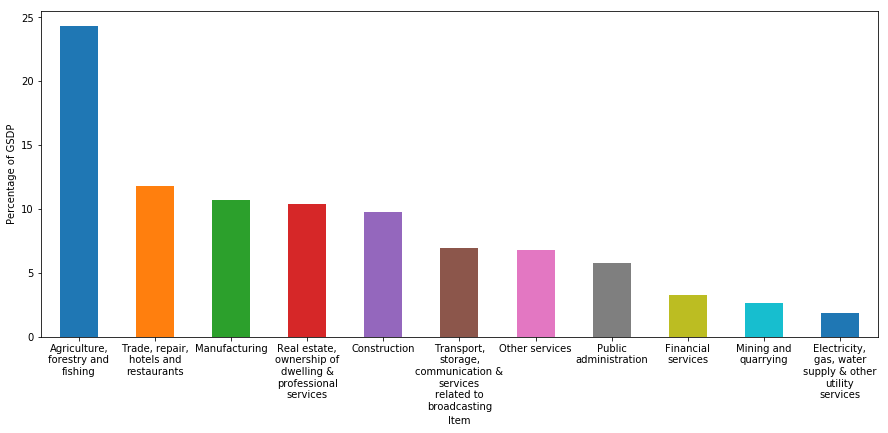

In [35]:
# Sectors that contribute to 80% of GSDP in category C4
cum_sum(df_cat['C4'])

# Part-II: GDP and Education Dropout Rates

In [36]:
#importing dataset of the dropout rate
drop_rate=pd.read_csv('rs_session243_au570_1.1.csv')
drop_rate.head()

,Sl. No.,Level of Education - State,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
0,1,A & N Islands,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.87,14.14,15.87,16.93
1,2,Andhra Pradesh,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.71,0.35,11.79,NaN
2,3,Arunachal Pradesh,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.11,5.11,17.07,18.42
3,4,Assam,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.06,4.69,7.24,NaN
4,5,Bihar,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.90,NaN,NaN,NaN


In [37]:
# removing unnecessary columns
drop_rate.drop(['Sl. No.','Primary - 2012-2013','Primary - 2014-2015','Upper Primary - 2012-2013', 'Upper Primary - 2013-2014','Secondary - 2012-2013','Secondary - 2013-2014', 'Senior Secondary - 2012-2013', 'Senior Secondary - 2013-2014','Senior Secondary - 2014-2015'],axis=1,inplace=True)
print(f"The shape is ", drop_rate.shape)
drop_rate.head()


The shape is  (37, 4)


,Level of Education - State,Primary - 2014-2015.1,Upper Primary - 2014-2015,Secondary - 2014-2015
0,A & N Islands,0.51,1.69,9.87
1,Andhra Pradesh,6.72,5.20,15.71
2,Arunachal Pradesh,10.82,6.71,17.11
3,Assam,15.36,10.51,27.06
4,Bihar,NaN,4.08,25.90


In [38]:
# Renaming columns
drop_rate.rename(columns={'Level of Education - State':'State','Primary - 2014-2015.1':'Primary','Upper Primary - 2014-2015':'Upper Primary','Secondary - 2014-2015':'Secondary'},inplace=True)
# dropping rows that correapond to union territories
rows_to_drop = ['A & N Islands','Chandigarh', 'Dadra & Nagar Haveli','Daman & Diu','Delhi','Lakshadweep','Puducherry','West Bengal','All India']
drop_rate.drop(pd.Index(np.where(drop_rate['State'].isin(rows_to_drop))[0]), inplace = True)
# setting state column as index to facilitate merging
drop_rate.set_index('State',drop=True,inplace=True)
print(drop_rate.shape)
drop_rate.head()

(28, 3)


,Primary,Upper Primary,Secondary
State,,,
Andhra Pradesh,6.72,5.20,15.71
Arunachal Pradesh,10.82,6.71,17.11
Assam,15.36,10.51,27.06
Bihar,NaN,4.08,25.90
Chhatisgarh,2.91,5.85,21.26


In [39]:
df_3=df_state.set_index('Item').T
df_3.index.rename('State',inplace=True)
df_3.head()


Item,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Services incidental to transport*,Trade & repair services*,Road transport**,Road transport*
State,,,,,,,,,,,,,,,,,,,,,
Andhra Pradesh,14819416.0,7893514.0,4309078.0,346160.0,2270664.0,1484300.0,16303716.0,4672266.0,1151729.0,4664889.0,...,48825542.0,5512100.0,1690800.0,52646842.0,501510.0,104977.0,NaN,NaN,NaN,NaN
Arunachal Pradesh,686117.0,415520.0,38387.0,224017.0,8193.0,30842.0,716959.0,26120.0,113527.0,147842.0,...,1636292.0,70099.0,30272.0,1676119.0,14870.0,112718.0,NaN,NaN,NaN,NaN
Assam,3855548.0,2890544.0,173478.0,261987.0,529539.0,1471149.0,5326697.0,2002936.0,296587.0,1733568.0,...,18666897.0,1725309.0,582406.0,19809800.0,326780.0,60621.0,NaN,NaN,NaN,NaN
Bihar,7951890.0,4688237.0,2060296.0,550132.0,653224.0,68107.0,8019997.0,2189965.0,345168.0,3449763.0,...,36184863.0,3213546.0,2006421.0,37391988.0,1101240.0,33954.0,NaN,NaN,NaN,NaN
Chhattisgarh,3948847.0,2613371.0,352208.0,597785.0,385483.0,2451970.0,6400817.0,4370593.0,1198438.0,2669855.0,...,22228481.0,2601791.0,1332092.0,23498180.0,270530.0,86860.0,NaN,NaN,NaN,NaN


In [40]:
# adding the Per Capita GDP column to drop out rate data frame
drop_rate['Per Capita GSDP (Rs.)']=df_3['Per Capita GSDP (Rs.)']
drop_rate.isnull().sum() # checking NaN values

Primary                  3
Upper Primary            2
Secondary                0
Per Capita GSDP (Rs.)    3
dtype: int64

In [41]:
drop_rate

,Primary,Upper Primary,Secondary,Per Capita GSDP (Rs.)
State,,,,
Andhra Pradesh,6.72,5.20,15.71,104977.0
Arunachal Pradesh,10.82,6.71,17.11,112718.0
Assam,15.36,10.51,27.06,60621.0
Bihar,NaN,4.08,25.90,33954.0
Chhatisgarh,2.91,5.85,21.26,NaN
Goa,0.73,0.07,11.15,271793.0
Gujarat,0.89,6.41,25.04,141263.0
Haryana,5.61,5.81,15.89,164077.0
Himachal Pradesh,0.64,0.87,6.07,147330.0


In [42]:
# The NaN values in Per Capita GSDP column is due to the mismatch of row names in the two dataframes.
# So the column names of drop_rat dataframe is renamed to match that of the df_state column
drop_rate.rename({'Chhatisgarh': 'Chhattisgarh','Jammu and Kashmir' : 'Jammu Kashmir', 'Uttrakhand' : 'Uttarakhand'},axis=0,inplace=True)
# Percapita GSDP column is overwritten now
drop_rate['Per Capita GSDP (Rs.)']=df_3['Per Capita GSDP (Rs.)']
drop_rate

,Primary,Upper Primary,Secondary,Per Capita GSDP (Rs.)
State,,,,
Andhra Pradesh,6.72,5.20,15.71,104977.0
Arunachal Pradesh,10.82,6.71,17.11,112718.0
Assam,15.36,10.51,27.06,60621.0
Bihar,NaN,4.08,25.90,33954.0
Chhattisgarh,2.91,5.85,21.26,86860.0
Goa,0.73,0.07,11.15,271793.0
Gujarat,0.89,6.41,25.04,141263.0
Haryana,5.61,5.81,15.89,164077.0
Himachal Pradesh,0.64,0.87,6.07,147330.0


Now, we can observe that there are no NaN values in Per capita GSDP column. The NaN values in the other columns may be due
to missing information .  Since these numbers can't be imputed, the missing values are not filled

Text(0.5, 1.0, 'Dropout rate in Primary education vs GSDP')

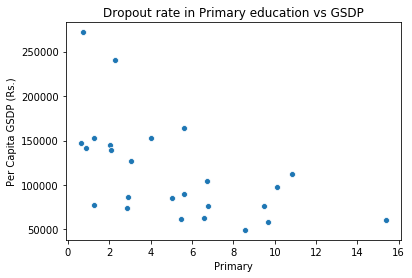

In [43]:
# To determine the correlation between Per Capita GSDP and drop out rate in Primary education
sns.scatterplot(drop_rate['Primary'],drop_rate['Per Capita GSDP (Rs.)'])
plt.title('Dropout rate in Primary education vs GSDP')

Drop out rate is very high when Per Capita GSDP is less than Rs. 70000 appproximately and becomes very less when Per Capita GSDP is greater than 160000. This decreasing trend in the graph indicates that the drop out rate in Primary education decreases with increase in GDP.

Text(0.5, 1.0, 'Dropout rate in Upper Primary education vs GSDP')

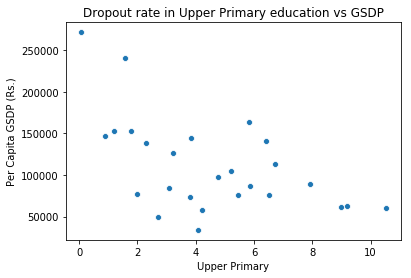

In [44]:
# To determine the correlation between Per Capita GSDP and drop out rate in Secondary education
sns.scatterplot(drop_rate['Upper Primary'],drop_rate['Per Capita GSDP (Rs.)'])
plt.title('Dropout rate in Upper Primary education vs GSDP')

For Upper Primary education, though we don't observe a strong negative corelation, however we can notice a decreasing trend in the graph which indicates that the drop out rate in Upper Primary education decreases with increase in GDP

Text(0.5, 1.0, 'Dropout rate in Secondary education vs GSDP')

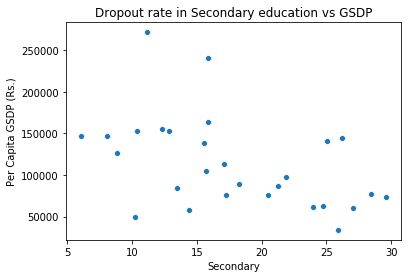

In [45]:
# To determine the correlation between Per Capita GSDP and drop out rate in Secondary education
sns.scatterplot(drop_rate['Secondary'],drop_rate['Per Capita GSDP (Rs.)'])
plt.title('Dropout rate in Secondary education vs GSDP')

Drop out rate for secondary education level is randomly distributed upto Per Capita GSDP of Rs.150000.However the drop out rate is higher than in other level of education.We can also observe that the drop out rate is higher for a GSDP of Rs.200000 and above also 